In [24]:
import numpy as np
from keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import visualkeras

In [25]:
import time
import datetime
import os
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard

In [26]:
BATCH_SIZE = 25

In [27]:
#Training data
train_path = 'C:\\Users\\Eliza Marie\\Desktop\\THESIS\\fish or not\\train'
#C:\Users\Eliza Marie\Anaconda\train_folder
train_datagen = ImageDataGenerator(rescale=1. / 255)
#change to categorical
train = train_datagen.flow_from_directory(train_path, target_size=(227,227), class_mode='categorical',
                                         color_mode="rgb",
                                         batch_size=BATCH_SIZE,
                                         seed=7,
                                         shuffle=True)

Found 4411 images belonging to 2 classes.


In [28]:
path_test = 'C:\\Users\\Eliza Marie\\Desktop\\THESIS\\fish or not\\test'
predict_datagen = ImageDataGenerator(rescale=1. / 255)
predict = predict_datagen.flow_from_directory(path_test, target_size=(227,227), batch_size = 1,class_mode='categorical')

Found 299 images belonging to 1 classes.


In [29]:
#Validation data
validation_path = 'C:\\Users\\Eliza Marie\\Desktop\\THESIS\\fish or not\\validation'
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(validation_path, target_size=(227,227), class_mode='categorical',
                                         color_mode="rgb",
                                         batch_size=BATCH_SIZE,
                                         seed=7,
                                         shuffle=True)

Found 430 images belonging to 2 classes.


In [30]:
test_datagen2 = ImageDataGenerator(rescale=1. / 255)
test2 = test_datagen2.flow_from_directory(validation_path, target_size=(227,227), class_mode='categorical',
                                         color_mode="rgb",
                                         batch_size=430,
                                         seed=7,
                                         shuffle=True)

Found 430 images belonging to 2 classes.


In [31]:
#Verify our generator by plotting a few faces and printing corresponding labels
class_labels=['fish', 'not a fish']

In [ ]:
#iter_lst = iter(train)
#while True:
#    try:
#        img, label = iter_lst.__next__()
#    except:
#        break

In [32]:
img, label = train.__next__()

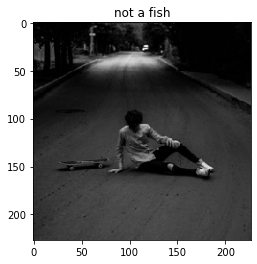

In [33]:
import random

i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()

In [34]:
print(img.shape[0])

25


In [35]:
#
type(train)

keras.preprocessing.image.DirectoryIterator

In [36]:
type(train_datagen)

keras.preprocessing.image.ImageDataGenerator

In [37]:
# 
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (25, 227, 227, 3)
Batch Size for Output Image :  (25, 2)
Image Size of first image :  (227, 227, 3)
Output of first image :  (2,)


Text(0.5, 1.0, '[1. 0.]')

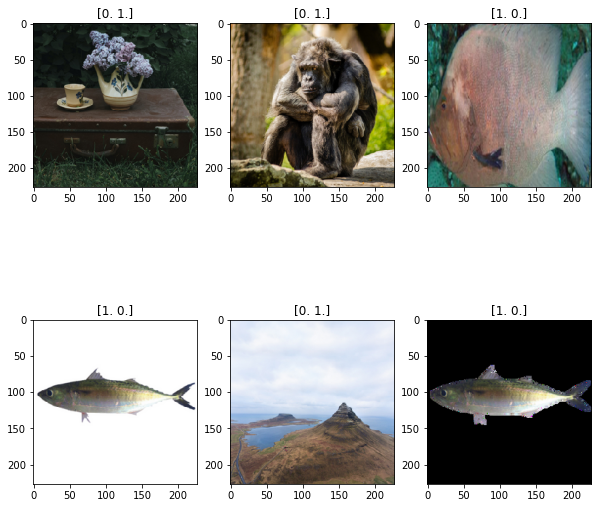

In [38]:
#showing images from training data
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])
axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])
axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])
axs[1][0].imshow(train[0][0][20])
axs[1][0].set_title(train[0][1][20])
axs[1][1].imshow(train[0][0][15])
axs[1][1].set_title(train[0][1][15])
axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])

In [39]:
#1 AlexNet function definition
def AlexNet(in_shape):
    X_input = Input(in_shape)
    
    # Initialize model
    alexnet = Sequential()
    
    # Layer 1
    alexnet.add(Conv2D(96, (11, 11), strides = 4,name="conv0", input_shape= in_shape,
        padding='valid', kernel_initializer= 'he_normal'))
    alexnet.add(BatchNormalization(axis = 3 , name = "bn0"))
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(3, 3),  padding= 'valid', strides = (2,2),data_format= None, name = 'max0'))
    
    # Layer 2
    alexnet.add(Conv2D(256, (5, 5), strides = 1, padding='same', kernel_initializer= 'he_normal', name = 'conv1'))
    alexnet.add(BatchNormalization(axis = 3 ,name='bn1'))
    alexnet.add(Activation('relu'))
    alexnet.add(MaxPooling2D(pool_size=(3, 3),padding= 'valid', strides = (2,2),data_format= None, name = 'max1'))
    
    
# Layer 3
    alexnet.add(Conv2D(384, (3, 3), strides = 1, padding='same', kernel_initializer= 'he_normal', name='conv2'))
    alexnet.add(BatchNormalization(axis = 3, name = 'bn2'))
    alexnet.add(Activation('relu'))

# Layer 4
    alexnet.add(Conv2D(384, (3, 3), strides = 1, padding='same',kernel_initializer= 'he_normal', name='conv3'))
    alexnet.add(BatchNormalization(axis = 3, name = 'bn3'))
    alexnet.add(Activation('relu'))
    
# Layer 5
    alexnet.add(Conv2D(256, (3, 3), strides = 1, padding='same', kernel_initializer= 'he_normal', name = 'conv4'))
    alexnet.add(BatchNormalization(axis = 3 ,name='bn4'))
    alexnet.add(Activation('softmax'))
    
    alexnet.add(MaxPooling2D(pool_size=(3, 3),padding= 'valid', strides = (2,2),name = 'max2'))
    #alexnet.add(MaxPooling2D(pool_size=(2, 2),padding= 'valid', strides = 2,name = 'max2'))


    alexnet.add(Flatten())

    #alexnet.add(Dropout(0.5))
    
    alexnet.add(Dense(4096, activation = 'relu', name = "fc0"))
    #alexnet.add(Dense(1024, activation = 'relu', name = "fc0"))

    alexnet.add(Dropout(0.5))
    
    alexnet.add(Dense(4096, activation = 'relu', name = "fc1"))
    #alexnet.add(Dense(1024, activation = 'relu', name = "fc1"))
    
    alexnet.add(Dropout(0.5))
    
    alexnet.add(Dense(1000, activation = 'relu'))
    
    alexnet.add(Dense(2, activation = 'softmax', name = "fc2")) #change to softmax later
    
    return alexnet

In [40]:
alexnetModel = AlexNet(train[0][0].shape[1:])

In [ ]:
#alexnetModel.summary()

In [41]:
from keras import optimizers

In [42]:
sgdm = optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [43]:
alexnetModel.compile(optimizer=sgdm, loss = 'categorical_crossentropy' , 
                     metrics=['accuracy'])
# tf.keras.optimizers.Adam(0.001)

In [ ]:
#5
os.mkdir('./logs4')
os.mkdir('./logs4/fit')

In [ ]:
train_num = train.samples
valid_num = test.samples

In [44]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)
    
num_test_imgs = 0
for root, dirs, files in os.walk(path_test):
    num_test_imgs += len(files)

In [45]:
print(num_train_imgs)
print(num_test_imgs)

4411
299


In [46]:
log_dir="./logs4/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
callback_list = [tensorboard_callback]

# start training
alexnetModel.fit(train,epochs=2, batch_size = BATCH_SIZE,
        steps_per_epoch=num_train_imgs// BATCH_SIZE,
        validation_data=test,
        validation_steps=num_test_imgs// BATCH_SIZE,
        callbacks=callback_list,
        #verbose=0,
        validation_freq=1)

Epoch 1/2
176/176 [==============================] - 432s 2s/step - loss: 0.3847 - accuracy: 0.8212 - val_loss: 0.3156 - val_accuracy: 0.8509
Epoch 2/2
176/176 [==============================] - 414s 2s/step - loss: 0.0999 - accuracy: 0.9674 - val_loss: 0.1238 - val_accuracy: 0.9345


In [47]:
alexnetModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv0 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 55, 55, 96)        384       
                                                                 
 activation_5 (Activation)   (None, 55, 55, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 27, 27, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 27, 27, 256)       1024      
                                                                 
 activation_6 (Activation)   (None, 27, 27, 256)      

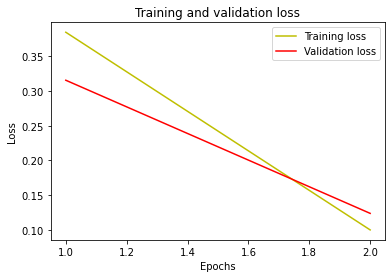

In [48]:
loss = alexnetModel.history.history['loss']
val_loss = alexnetModel.history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [49]:
acc = alexnetModel.history.history['accuracy']
#acc = history.history['accuracy']
val_acc = alexnetModel.history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

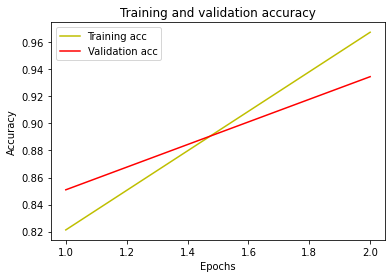

In [50]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [51]:
#Generate a batch of images
test_img, test_lbl = test2.__next__()
predictions=alexnetModel.predict(test_img)

14/14 [==============================] - 8s 544ms/step


In [52]:
predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

In [53]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

Accuracy =  0.9302325581395349


In [54]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions)
print(cm)

[[170  30]
 [  0 230]]


<AxesSubplot:>

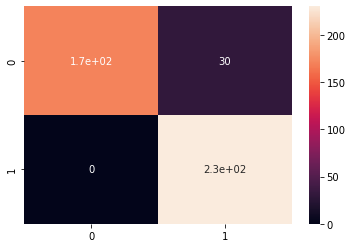

In [55]:
import seaborn as sns
sns.heatmap(cm, annot=True)

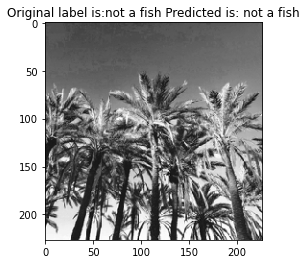

In [56]:
#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
#n = 17
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()

In [ ]:
#7
alexnetModel.history.history.keys()

In [ ]:
#7
f,ax=plt.subplots(2,1,figsize=(10,10)) 

#Assigning the first subplot to graph training loss and validation loss
ax[0].plot(alexnetModel.history.history['loss'],color='b',label='Training Loss')
ax[0].plot(alexnetModel.history.history['val_loss'],color='r',label='Validation Loss')

#Plotting the training accuracy and validation accuracy
ax[1].plot(alexnetModel.history.history['accuracy'],color='b',label='Training  Accuracy')
ax[1].plot(alexnetModel.history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [ ]:
#print('Accuracy Score = ',np.max(alexnetModel.history.history['val_accuracy']))

In [ ]:
#import keras.backend as K
#K.set_image_data_format('channels_last')

In [59]:
# Evaluate on Validation data
scores = alexnetModel.evaluate(predict)
print("%s%s: %.2f%%" % ("evaluate ",alexnetModel.metrics_names[1], scores[1]*100))

299/299 [==============================] - 14s 46ms/step - loss: 6.1606 - accuracy: 0.5017
evaluate accuracy: 50.17%


In [60]:
predictions = alexnetModel.predict(predict)

299/299 [==============================] - 14s 46ms/step


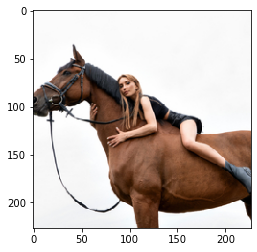

In [61]:
imshow(predict[7][0][0])

In [62]:
values = predictions[7]
#print(predictions[70])
floats = [float(x) for x in values]
print(floats)

[0.9999828338623047, 1.7126149032264948e-05]


In [63]:
import os 
def get_category(predicted_output):
    path ="C:\\Users\\Eliza Marie\\Desktop\\THESIS\\fish or not\\train"
    return os.listdir(path)[np.argmax(predicted_output)]

In [64]:
print(get_category(predictions[7]))

fish


Text(0.5, 1.0, 'not a fish')

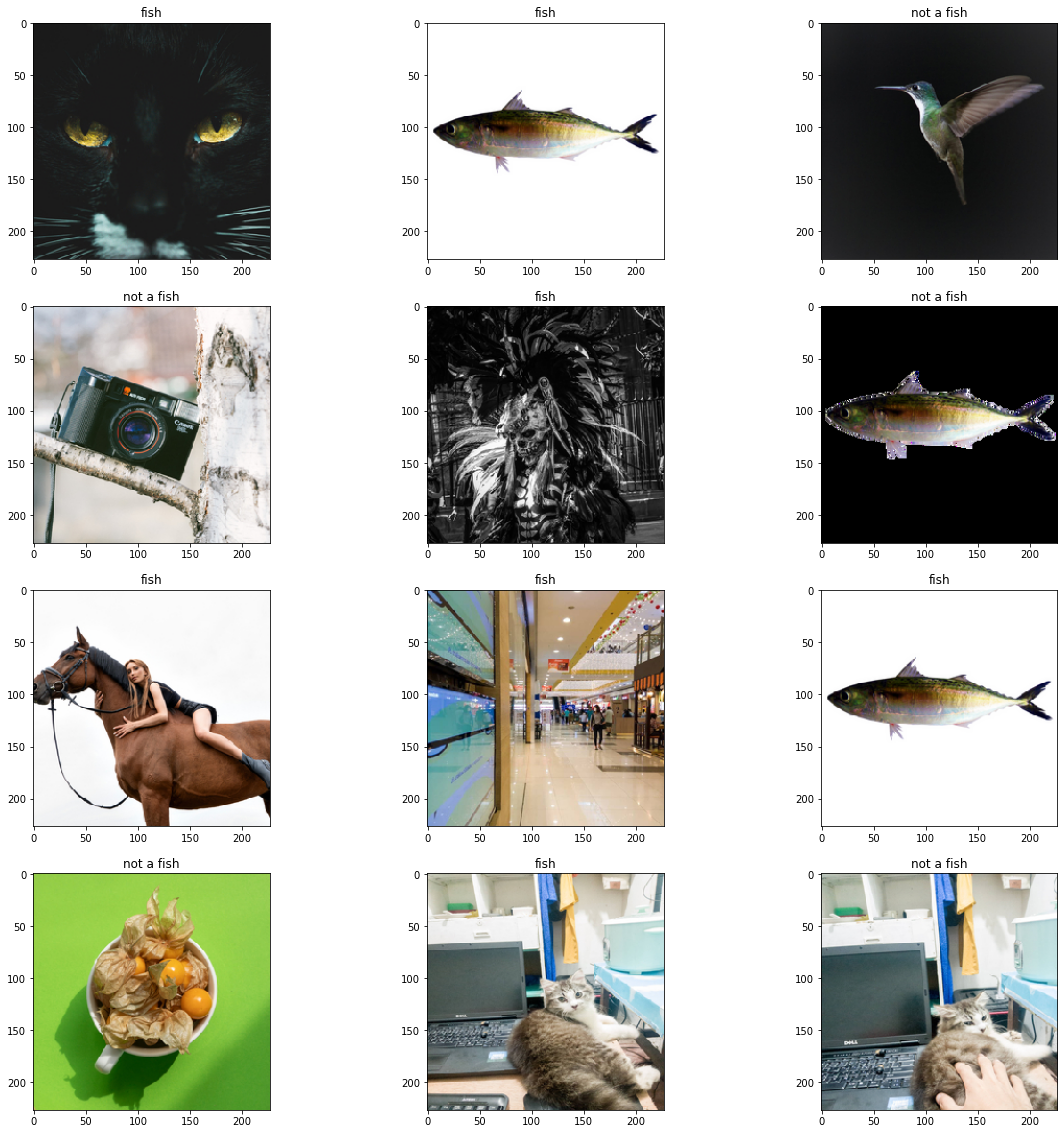

In [65]:
fig , axs = plt.subplots(4,3 ,figsize = (20,20))

axs[0][0].imshow(predict[1][0][0])
axs[0][0].set_title(get_category(predictions[1]))

axs[0][1].imshow(predict[2][0][0])
axs[0][1].set_title(get_category(predictions[2]))

axs[0][2].imshow(predict[3][0][0])
axs[0][2].set_title(get_category(predictions[3]))

axs[1][0].imshow(predict[4][0][0])
axs[1][0].set_title(get_category(predictions[4]))

axs[1][1].imshow(predict[5][0][0])
axs[1][1].set_title(get_category(predictions[5]))

axs[1][2].imshow(predict[6][0][0])
axs[1][2].set_title(get_category(predictions[6]))

axs[2][0].imshow(predict[7][0][0])
axs[2][0].set_title(get_category(predictions[7]))

axs[2][1].imshow(predict[8][0][0])
axs[2][1].set_title(get_category(predictions[8]))

axs[2][2].imshow(predict[9][0][0])
axs[2][2].set_title(get_category(predictions[9]))

axs[3][0].imshow(predict[10][0][0])
axs[3][0].set_title(get_category(predictions[10]))

axs[3][1].imshow(predict[45][0][0])
axs[3][1].set_title(get_category(predictions[45]))

axs[3][2].imshow(predict[65][0][0])
axs[3][2].set_title(get_category(predictions[65]))

In [ ]:
import visualkeras
visualkeras.layered_view(alexnetModel)

In [ ]:
#alexnetModel.save("fishornot.model")

In [ ]:
#tf.keras.models.save_model(alexnetModel, "fishornot.pbtxt")

In [ ]:
#tf.keras.models.save_model(alexnetModel, "fishornot.h5")